-0.00604943931784 1.4165662673 -13.8049415477 -26.1872580768 9.8151803468e-06
[  2.44268559e-04   3.99461163e-02   2.79391222e+00   3.52882609e+00
   4.81528331e-07]
[0.83603950135039695, 0.91703310930638038, 0.94057608901611045, 0.93832822466253241, 0.92281583873045037, 0.89998865661953698, 0.87303510210208557, 0.84381767539833386, 0.81349728587704762, 0.78283517451375217, 0.75235127710399574, 0.72241281741934149, 0.69328653885395308, 0.6651708710618216, 0.63821648319922297, 0.6125398378270368, 0.58823237698388298, 0.56536689888012936, 0.54400207898916275, 0.52418573636777821, 0.50595723352978039, 0.48934926666596845, 0.47438921955722119, 0.46110020039614924, 0.4495018449037238, 0.43961094497370906, 0.43144194551994003, 0.42500734067498896, 0.4203179923503288, 0.41738338834621269, 0.41621185298393909, 0.41681072014616249, 0.41918647632644568]


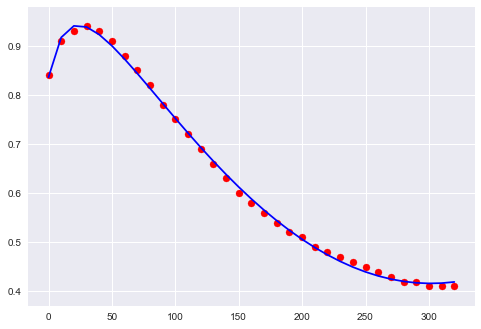

In [6]:
import csv
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import math


def test_fit(x,a,b,c,d,f):
    return( a*x + b + c/(x-d) + f*(x**2))
   
    
X=[]
Y=[]
with open('MGH17_curvefit.csv') as f:
    reader = csv.reader(f)
    next(reader, None) #skip the headers
    for row in reader:
        Y.append(float(row[0]))
        X.append(float(row[1]))
        
x=np.array(X)
y=np.array(Y)
y_norm = [y0/max(Y) for y0 in Y]

params,covar = curve_fit(test_fit,x,y_norm)
print(*params)
#print(covar)
perr = np.sqrt(np.diag(covar))
print(perr)

y_pred = [x * max(Y) for x in test_fit(x, *params)]
print(y_pred)
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()